# Library

In [527]:
import pandas as pd
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Uploading Dataset:
#### The dataset was uploaded to GitHub and imported into a DataFrame to begin the analysis.

In [528]:
url = "https://raw.githubusercontent.com/MahsaDorri/SSC-3250/main/titanic%20-%20train.csv"
df = pd.read_csv(url)
df.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [451]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [452]:
df.shape

(891, 12)

In [453]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 The isnull() function is used to identify missing values in the dataset. As observed, the columns **Age** and **Cabin** contain the highest number of null entries.
Since the Cabin column has a large proportion of missing values and limited analytical value for this assignment, it will be dropped from the dataset.


In [455]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [529]:
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [530]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [531]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [532]:
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'S', 'Embarked'] = 2
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 3
df['Embarked']

0      2
1      1
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    1
890    3
Name: Embarked, Length: 891, dtype: object

#### I decide to drop Embarked null records

In [533]:
df.dropna(subset= 'Embarked', inplace=True)

In [461]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

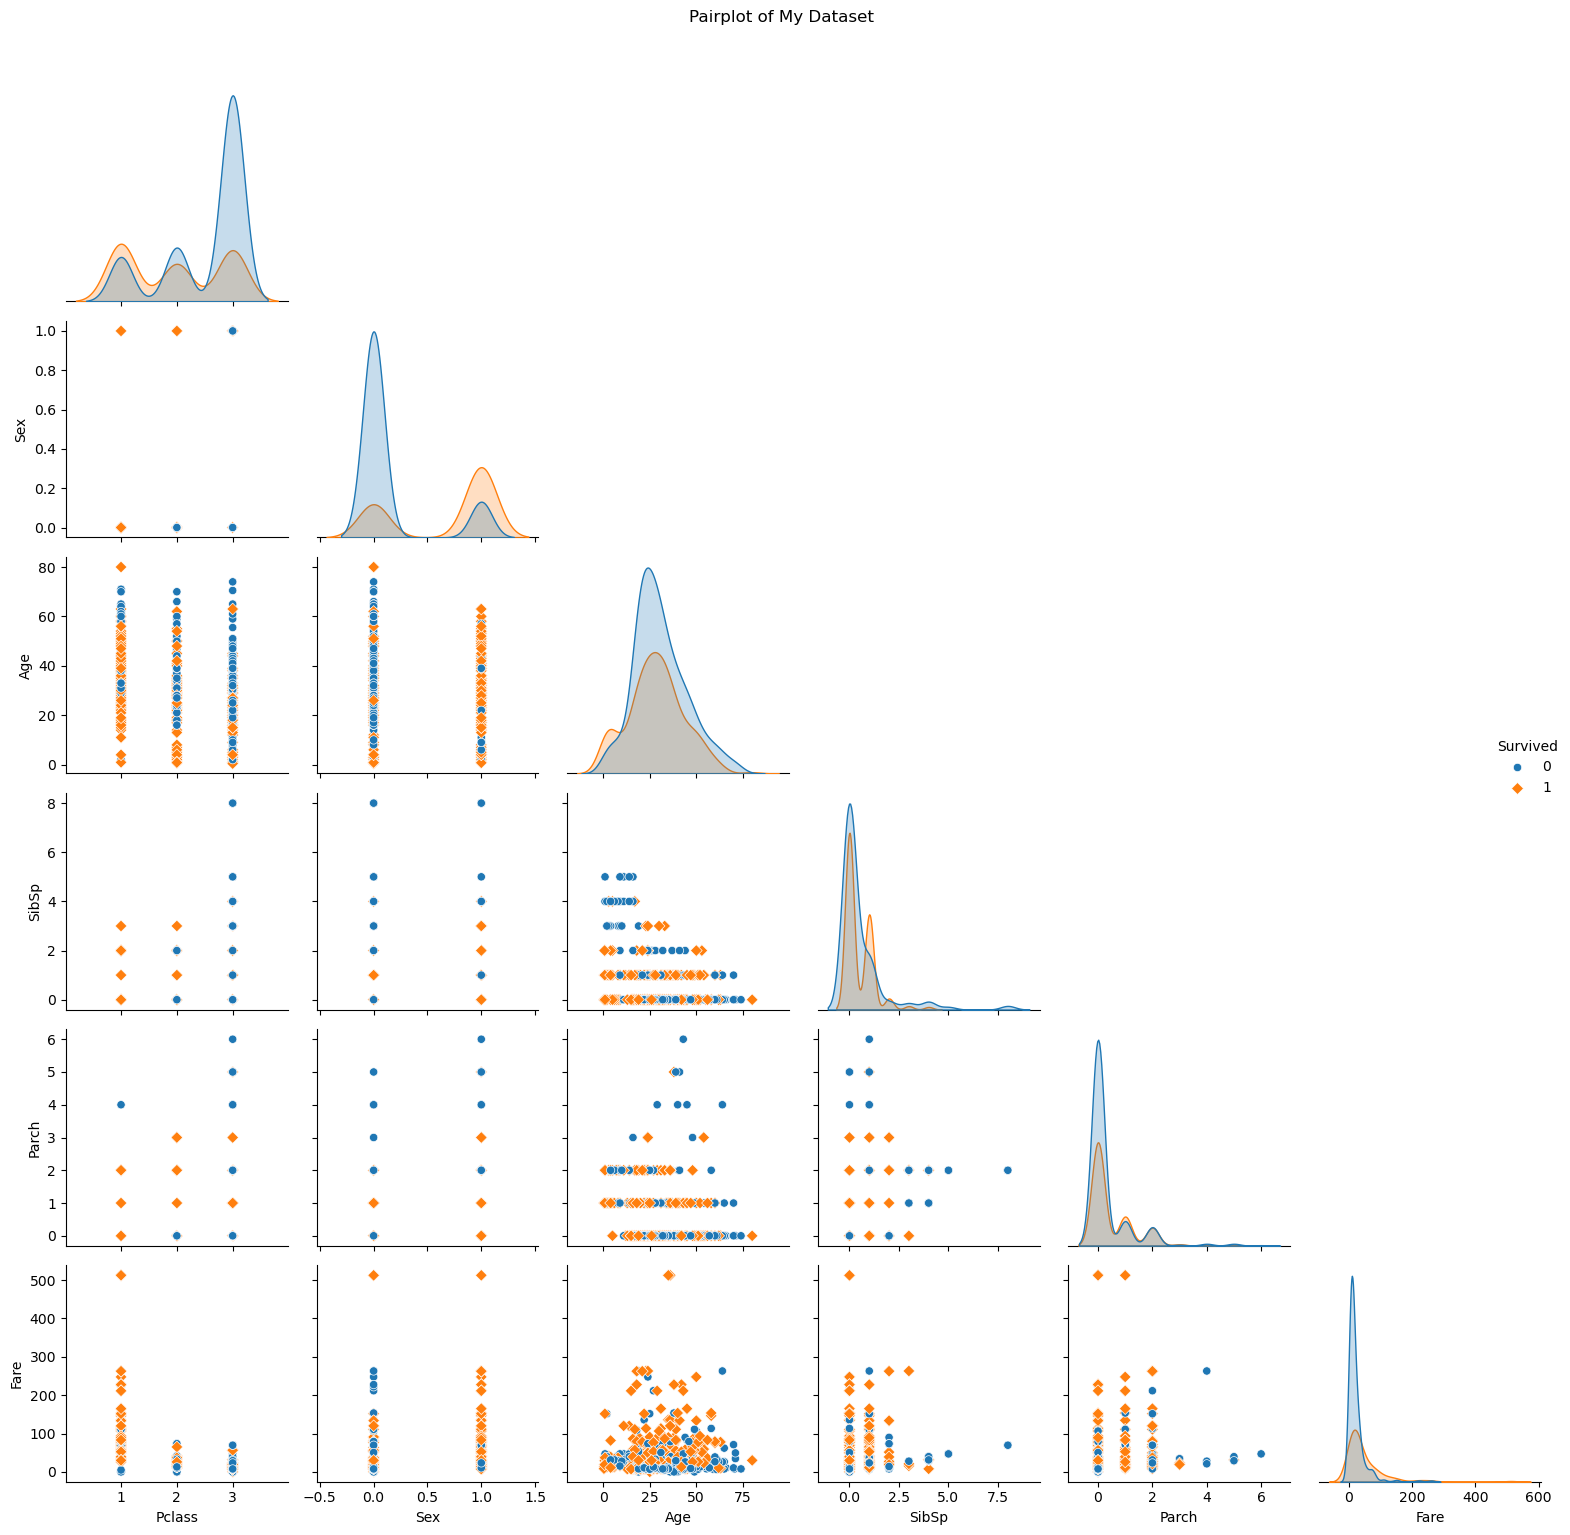

In [462]:
sns.pairplot(
    data=df,
    vars=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], 
    hue='Survived',       
    markers=["o", "D"],  
    corner=True          
)
plt.suptitle('Pairplot of My Dataset', y=1.02)
plt.tight_layout()
plt.show()

In [463]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1


In [535]:
 df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

## Fill null age value by Median.
The **Age** column contains 177 missing values. Given the importance of age in survival analysis, I will use two different imputation methods to handle these missing values:
**Median** Imputation: A simple and fast method that replaces missing values with the median of the existing Age values.


In [437]:
df.drop('PassengerId', axis=1, inplace=True)


In [438]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,2
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,2
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1


In [489]:
df['Age'].fillna(value=df['Age'].median(), inplace=True)

/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_20373/3049057898.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(value=df['Age'].median(), inplace=True)


#### Drop Ticket column
The Ticket column contains unstructured alphanumeric values that are difficult to interpret. Since fare related information is already captured by the Fare and Pclass columns, Ticket will be dropped to simplify the analysis

In [490]:
df.drop('Ticket', axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGrouped
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,2,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,2,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,2,Adult
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,2,Adult
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,2,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,2,Young Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,15.638366,1,2,23.4500,2,Teenager
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,1,Young Adult


## Correlation Heatmap 
#### Sex, Pclass, and Fare show the strongest correlation with survival, highlighting gender, class, and fare as key survival factors

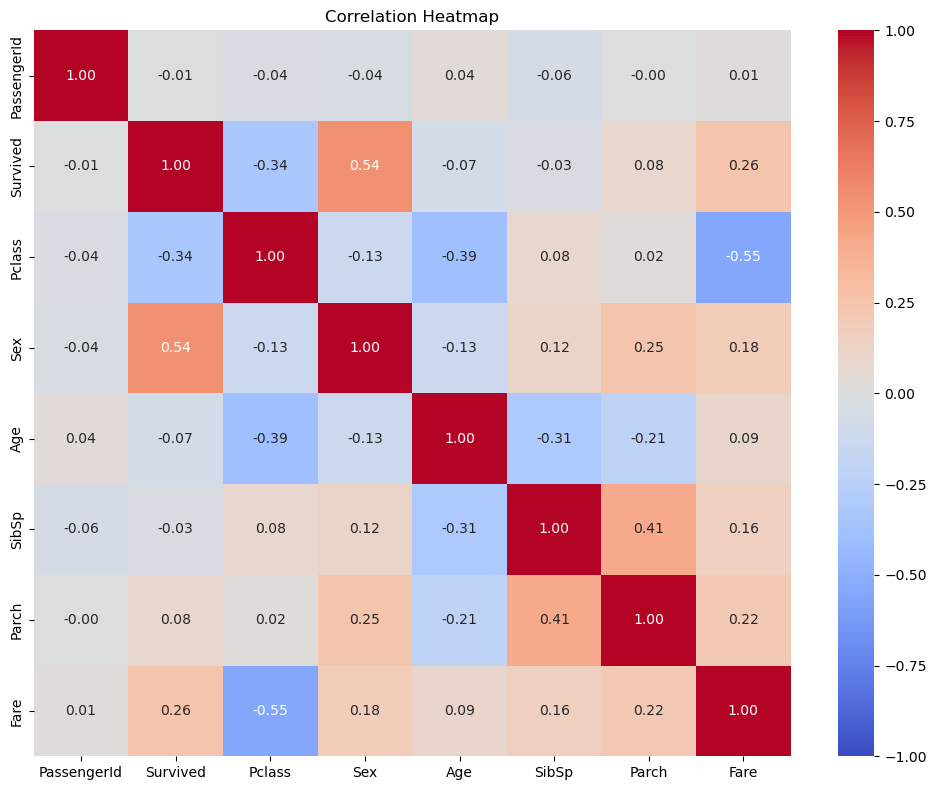

In [491]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix=numeric_df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()  
plt.show()

Custom functions were written to categorize the **Age** and **Fare** columns, enabling clearer grouping and more structured analysis

In [492]:
def Age_Category(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age<12:
        return 'Child'
    elif age<18:
        return 'Teenager'
    elif age <35:
        return 'Young Adult'
    elif age <60:
        return 'Adult' 
    else:
        return 'Senior'
df['AgeGrouped'] = df['Age'].apply(Age_Category)


In [493]:
df.drop('Age', axis= 1, inplace= True)
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGrouped
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,7.2500,2,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,71.2833,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,7.9250,2,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,53.1000,2,Adult
4,5,0,3,"Allen, Mr. William Henry",0,0,0,8.0500,2,Adult
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,0,13.0000,2,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",1,0,0,30.0000,2,Young Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1,2,23.4500,2,Teenager
889,890,1,1,"Behr, Mr. Karl Howell",0,0,0,30.0000,1,Young Adult


In [536]:
df.drop(['PassengerId','Name'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,A/5 21171,7.2500,2
1,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,1,35.0,1,0,113803,53.1000,2
4,0,3,0,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,211536,13.0000,2
887,1,1,1,19.0,0,0,112053,30.0000,2
888,0,3,1,NaN,1,2,W./C. 6607,23.4500,2
889,1,1,0,26.0,0,0,111369,30.0000,1


In [494]:
def Fare_category(Fare):
    if pd.isnull(Fare):
        return 'Unknown'
    elif Fare<=20:
        return 'Low'
    elif Fare<=60:
        return 'Mid'
    elif Fare<=110:
        return 'High'
    else:
        return 'very High'
df['Fare_category'] = df['Fare'].apply(Fare_category)
df.drop('Fare',axis=1,inplace=True)

In [495]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,AgeGrouped,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,2,Young Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,1,Adult,High
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,2,Young Adult,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,2,Adult,Mid
4,5,0,3,"Allen, Mr. William Henry",0,0,0,2,Adult,Low
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,0,2,Young Adult,Low
887,888,1,1,"Graham, Miss. Margaret Edith",1,0,0,2,Young Adult,Mid
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1,2,2,Teenager,Mid
889,890,1,1,"Behr, Mr. Karl Howell",0,0,0,1,Young Adult,Mid


# Question 1
Which categories of passengers were most likely to survive the Titanic disaster? 4 points (This mark includes 2 points for answering the main questions and 2 points for explaining the logic of the analysis in detail)

#### Gender was the most significant factor, with females having a 74% survival rate compared to only 19% for males, reflecting the prioritization of women during evacuation.

In [518]:
survived_Sex=pd.DataFrame(df.groupby(['Sex'])['Survived'].mean().sort_values(ascending=False)) 
survived_Sex.columns = ['By Sex']
survived_Sex

,By Sex
Sex,
1,0.740385
0,0.188908


#### Age had a clear effect on survival, with children having the highest survival rate (54%) and seniors the lowest (24%), supporting the idea that younger passengers were prioritized in evacuation efforts

In [517]:
survived_Age=pd.DataFrame(df.groupby('AgeGrouped')['Survived'].mean().sort_values(ascending=False))
survived_Age.columns = ['By Age']
survived_Age

,By Age
AgeGrouped,
Child,0.541667
Teenager,0.428571
Adult,0.401747
Young Adult,0.353057
Senior,0.240000


In [329]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'AgeGrouped'],
      dtype='object')

#### First class passengers had the highest survival rate (62.6%), followed by second class (47.3%), while third class passengers had the lowest (24.2%).

In [521]:
survived_Pclass=pd.DataFrame(df.groupby('Pclass')['Survived'].mean().sort_values(ascending=False))
survived_Pclass.columns = ['By Pclass']
survived_Pclass

,By Pclass
Pclass,
1,0.626168
2,0.472826
3,0.242363


#### Having 1–3 parents or children on board correlated with higher survival (up to 60%), but having no one (Parch=0) or a large number (Parch ≥ 4) reduced chances.

In [522]:
survived_Parch=pd.DataFrame(df.groupby('Parch')['Survived'].mean().sort_values(ascending=False))
survived_Parch.columns = ['By Parch']
survived_Parch

,By Parch
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.341716
5,0.200000
4,0.000000
6,0.000000


#### Best survival rate: Passengers with 1 or 2 siblings/spouses on board had the highest survival rates (54% and 46%).

In [513]:
survived_SibSp=pd.DataFrame(df.groupby('SibSp')['Survived'].mean().sort_values(ascending=False))
survived_SibSp.columns=['By SibSp']
survived_SibSp

,By SibSp
SibSp,
1,0.535885
2,0.464286
0,0.343234
3,0.250000
4,0.166667
5,0.000000
8,0.000000


#### Passengers who paid very high fares had the highest survival rate (76%), likely because they were in first class, closer to lifeboats, and prioritized in evacuation.

In [510]:
survived_Fare=pd.DataFrame(df.groupby('Fare_category')['Survived'].mean().sort_values(ascending=False))
survived_Fare.columns = ['By Fare']
survived_Fare

,By Fare
Fare_category,
very High,0.755102
High,0.605634
Mid,0.460630
Low,0.277670


# Conclution
<span style="color:blue" > Passengers with the highest survival were women, children, first-class, and those who paid very high fares. Survival dropped sharply for passengers in third class, males, large families, and older adults.</span><br>


In [524]:
print(" Survival Rate by Sex")
display(survived_Sex)

print("\nSurvival Rate by Pclass")
display(survived_Pclass)

print("\n Survival Rate by Age Group")
display(survived_Age)

print("\n Survival Rate by Fare Group")
display(survived_Fare)

print("\n Survival Rate by SibSp Group")
display(survived_SibSp)

print("\n Survival Rate by Parch Group")
display(survived_Parch)

 Survival Rate by Sex


,By Sex
Sex,
1,0.740385
0,0.188908



Survival Rate by Pclass


,By Pclass
Pclass,
1,0.626168
2,0.472826
3,0.242363



 Survival Rate by Age Group


,By Age
AgeGrouped,
Child,0.541667
Teenager,0.428571
Adult,0.401747
Young Adult,0.353057
Senior,0.240000



 Survival Rate by Fare Group


,By Fare
Fare_category,
very High,0.755102
High,0.605634
Mid,0.460630
Low,0.277670



 Survival Rate by SibSp Group


,By SibSp
SibSp,
1,0.535885
2,0.464286
0,0.343234
3,0.250000
4,0.166667
5,0.000000
8,0.000000



 Survival Rate by Parch Group


,By Parch
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.341716
5,0.200000
4,0.000000
6,0.000000


# Fill null age value by xgboost model.
The **Age** column contains 177 missing values. Given the importance of age in survival analysis, I will use two different imputation methods to handle these missing values:
 2) **XGBoost** Based Imputation: A more advanced approach that uses a machine learning model (XGBoost Regressor) to predict missing ages based on other passenger features such as Pclass, Sex, Fare, etc.

In [534]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']
age_df = df[features + ['Age']]
age_df

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3,0,1,0,7.2500,22.0
1,1,1,1,0,71.2833,38.0
2,3,1,0,0,7.9250,26.0
3,1,1,1,0,53.1000,35.0
4,3,0,0,0,8.0500,35.0
...,...,...,...,...,...,...
886,2,0,0,0,13.0000,27.0
887,1,1,0,0,30.0000,19.0
888,3,1,1,2,23.4500,NaN
889,1,0,0,0,30.0000,26.0


In [526]:
!pip install xgboost


In [472]:
known_age = age_df[age_df['Age'].notnull()]
unknown_age = age_df[age_df['Age'].isnull()]

In [481]:

X = known_age[features]
y = known_age['Age']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2)


In [484]:
model = XGBRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
)

[0]	validation_0-rmse:15.26998
[1]	validation_0-rmse:15.01376
[2]	validation_0-rmse:14.79036
[3]	validation_0-rmse:14.53647
[4]	validation_0-rmse:14.38713
[5]	validation_0-rmse:14.26397
[6]	validation_0-rmse:14.16349
[7]	validation_0-rmse:14.03501
[8]	validation_0-rmse:13.93135
[9]	validation_0-rmse:13.82744
[10]	validation_0-rmse:13.76842
[11]	validation_0-rmse:13.70924
[12]	validation_0-rmse:13.66235
[13]	validation_0-rmse:13.62973
[14]	validation_0-rmse:13.59186
[15]	validation_0-rmse:13.55419
[16]	validation_0-rmse:13.50167
[17]	validation_0-rmse:13.48518
[18]	validation_0-rmse:13.46109
[19]	validation_0-rmse:13.42505
[20]	validation_0-rmse:13.39846
[21]	validation_0-rmse:13.43384
[22]	validation_0-rmse:13.40730
[23]	validation_0-rmse:13.38233
[24]	validation_0-rmse:13.36147
[25]	validation_0-rmse:13.35489
[26]	validation_0-rmse:13.35969
[27]	validation_0-rmse:13.35617
[28]	validation_0-rmse:13.35446
[29]	validation_0-rmse:13.34167
[30]	validation_0-rmse:13.39990
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [485]:
X_missing = unknown_age[features]
predicted_ages = model.predict(X_missing)

In [486]:
df.loc[df['Age'].isnull(), 'Age'] = predicted_ages
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [487]:
def Age_Category(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age<12:
        return 'Child'
    elif age<18:
        return 'Teenager'
    elif age <35:
        return 'Young Adult'
    elif age <60:
        return 'Adult' 
    else:
        return 'Senior'
df['AgeGrouped'] = df['Age'].apply(Age_Category)

In [488]:
survived_Age=pd.DataFrame(df.groupby('AgeGrouped')['Survived'].mean().sort_values(ascending=False))
survived_Age

,Survived
AgeGrouped,
Child,0.541667
Teenager,0.428571
Adult,0.401747
Young Adult,0.353057
Senior,0.240000


## Conclution for 
The order of survival rates across categories remains consistent under both methods of imputing missing values. However, determining which imputation method is better requires evaluating the performance of the final predictive model for the target variable. It is also essential to ensure that the imputation process does not lead to data leakage or introduce bias into the analysis.

# Q2

In this analysis, I used the following attributes in addition to the target variable Survived:

1) Sex: Encoded as 0 (male) and 1 (female) for numeric analysis.

2) Pclass: Represents socio-economic class (1 = first class, etc.). Strongly correlated with survival.

3) AgeGrouped (engineered): Categorical version of age to explore survival across life stages.

4) Fare_category (engineered): Categorical version of fare used to study impact of ticket price.

5) SibSp: Number of siblings/spouses aboard. Used to evaluate family structure impact.

6) Parch: Number of parents/children aboard. Also represents family size.

7) Embarked: Encoded as numeric (C=1, S=2, Q=3). Used in initial exploration but not in final modeling.

# Q3

Yes, the following attributes were engineered to improve interpretability and performance:

AgeGrouped: Created from the Age column to classify passengers into life stages (Child, Teenager, Young Adult, Adult, Senior). This helped highlight survival patterns across age brackets.

Fare_category: Derived from the Fare column by binning into Low, Mid, High, and Very High fare ranges. This made it easier to observe survival trends based on ticket cost.

Sex and Embarked Encoding: Both were transformed from string categories into a numeric format for compatibility with models.

1) I decided to drop Embarked null records.

2) The Ticket column contains unstructured alphanumeric values that are difficult to interpret. Since fare related information is already captured by the Fare and Pclass columns, Ticket will be dropped to simplify the analysis.
3) Since the Cabin column has a large proportion of missing values and limited analytical value for this assignment, it will be dropped from the dataset.

4) I decided to drop Name and PassengerID. 

# Q4 
 How did you treat missing values?

Age: This column had 177 missing values. I used two different imputation methods:

    Median Imputation: Replaced missing values with the median age.
    
    XGBoost Regressor: Used other features (like Pclass, Sex, Fare, SibSp, and Parch) to predict missing ages. This method is more advanced but requires caution to prevent data leakage.

